Import Data

In [28]:
from tensorflow.keras.layers import Input , Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [2]:
train_path="/content/drive/MyDrive/fruit-classification-dataset"

In [3]:
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)

In [4]:
train_x=np.array(x_train)

In [5]:
train_x=train_x/255.0

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')

Found 200 images belonging to 4 classes.


In [8]:
train_y=training_set.classes

In [9]:
training_set.class_indices

{'apple': 0, 'banana': 1, 'mango': 2, 'strawberry': 3}

In [10]:
train_x.shape

(201, 224, 224, 3)

In [11]:
index = 200
train_x = np.delete(train_x, index, axis=0)

In [12]:
train_x.shape

(200, 224, 224, 3)

In [13]:
train_y.shape

(200,)

In [14]:
train_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [15]:
vgg = VGG19(input_shape=(224,224,3), weights='imagenet', include_top=False)


80134624/80134624 [==============================] - 5s 0us/step


In [16]:
#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False

In [17]:
x = Flatten()(vgg.output)
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(4, activation='softmax')(x)

In [18]:
model = Model(inputs=vgg.input, outputs=prediction)

In [19]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [20]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
xtrain,xtest , ytrain, ytest = train_test_split(train_x , train_y , test_size = 0.1 ,shuffle = True)

In [23]:
# fit the model
history = model.fit(
  xtrain,
  ytrain,
  validation_split=(0.1),
  epochs=10,
  batch_size=32,shuffle=True)

Epoch 1/10
6/6 [==============================] - 17s 808ms/step - loss: 1.7688 - accuracy: 0.3457 - val_loss: 1.3720 - val_accuracy: 0.6111
Epoch 2/10
6/6 [==============================] - 1s 157ms/step - loss: 0.6290 - accuracy: 0.7716 - val_loss: 1.8082 - val_accuracy: 0.3889
Epoch 3/10
6/6 [==============================] - 1s 150ms/step - loss: 0.4744 - accuracy: 0.8086 - val_loss: 0.6505 - val_accuracy: 0.7778
Epoch 4/10
6/6 [==============================] - 1s 145ms/step - loss: 0.1634 - accuracy: 0.9444 - val_loss: 0.5809 - val_accuracy: 0.8889
Epoch 5/10
6/6 [==============================] - 1s 143ms/step - loss: 0.1069 - accuracy: 0.9815 - val_loss: 0.5945 - val_accuracy: 0.7222
Epoch 6/10
6/6 [==============================] - 1s 143ms/step - loss: 0.0325 - accuracy: 0.9938 - val_loss: 0.7833 - val_accuracy: 0.6111
Epoch 7/10
6/6 [==============================] - 1s 144ms/step - loss: 0.0253 - accuracy: 1.0000 - val_loss: 0.4867 - val_accuracy: 0.7222
Epoch 8/10
6/6 [===

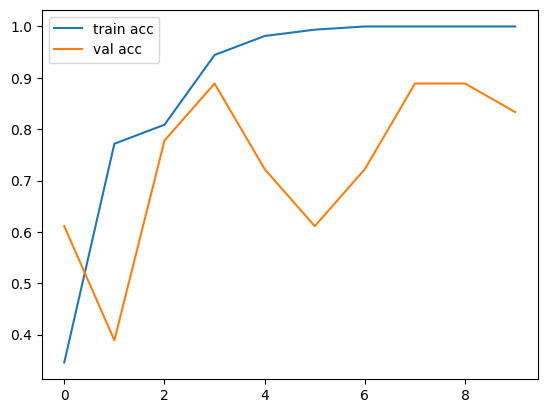

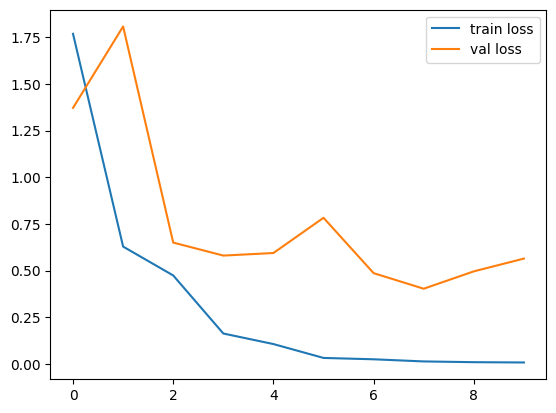

In [24]:
# accuracies

plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('vgg-acc-rps-1.png')

plt.show()
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()

In [25]:
model.evaluate(xtest,ytest,batch_size=32)

1/1 [==============================] - 3s 3s/step - loss: 0.5437 - accuracy: 0.9000


[0.5436774492263794, 0.8999999761581421]

In [26]:

#predict
y_pred=model.predict(xtest)
y_pred=np.argmax(y_pred,axis=1)
#get classification report
print(classification_report(y_pred,ytest))
#get confusion matrix
print(confusion_matrix(y_pred,ytest))

1/1 [==============================] - 0s 175ms/step
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       1.00      0.75      0.86         4
           2       0.86      1.00      0.92         6
           3       0.75      1.00      0.86         3

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.89        20
weighted avg       0.92      0.90      0.90        20

[[6 0 0 1]
 [0 3 1 0]
 [0 0 6 0]
 [0 0 0 3]]


In [29]:
cm = confusion_matrix(ytest,y_pred)

In [30]:
cm

array([[6, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 6, 0],
       [1, 0, 0, 3]])

Text(50.722222222222214, 0.5, 'Predictied Values')

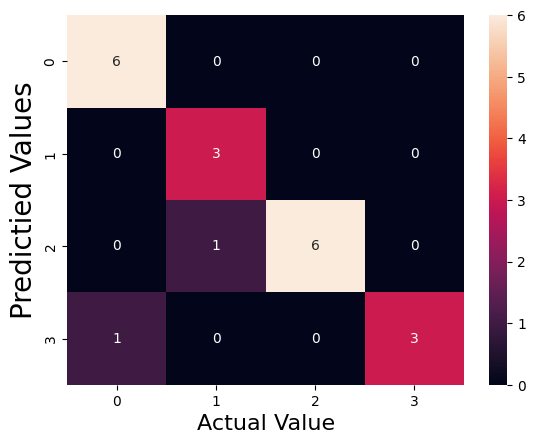

In [32]:
class_name = [0,1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_name))
plt.xticks(tick_marks)
plt.yticks(tick_marks)
sns.heatmap(cm ,annot = True)
plt.xlabel('Actual Value',fontsize = 16)
plt.ylabel('Predictied Values',fontsize = 20)
